# Biomedical Image Analysis Course on Data Camp 


1.   Exploration
       * Load Images
       * N-D data
       * Subplots
  <img src='https://cdn-images-1.medium.com/max/1600/1*1bNAG7ujkPbx64HWXKMoeg.png' align='right' width="500" height="300">     
2.   Mask & Filters
       * Intensity Distributions
       * Convolutions
       * Edge Detection

3.   Measurement
       * Labelling
       * Multi-object measurement
       * Morphology
       
4.   Image Comparisson
       * Transformations
       * Resampling
       * Const functions
       * Normalization


### Loading Images
 

*   imageio:read and save images
*   Image objects are Numpy arrays
*   Slice the array by specifying values along each availabel dimension



In [1]:
import imageio
im = imageio.imread('images/head_5.dcm')

In [2]:
type(im)

imageio.core.util.Image

In [3]:
im

Image([[-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       ...,
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048]], dtype=int16)

In [4]:
im[0, 0]

-2048

In [5]:
im[0:2, 0:2]

Image([[-2048, -2048],
       [-2048, -2048]], dtype=int16)

### Medadata
 * Medadata: the who, what, when, where and how of image acquisition.
 * Accessible in Image objects through the meta dictionary attribute
 

In [6]:
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.3983.1600.130079027103288237211121399038'),
      ('Modality', 'CT'),
      ('SeriesDescription', 'Axial'),
      ('PatientName', '0b8afe447b5f1a2c405f41cf2fb1198e'),
      ('PatientID', '0b8afe447b5f1a2c405f41cf2fb1198e'),
      ('PatientBirthDate', '19000101'),
      ('StudyInstanceUID',
       '2.25.89561893570483753331330741085866369150969669334491652729137'),
      ('SeriesInstanceUID',
       '2.25.11036428774731073064400491217100263734343718144389324827816'),
      ('SeriesNumber', 2),
      ('AcquisitionNumber', 1),
      ('InstanceNumber', 15),
      ('ImagePositionPatient', (-174.3, -156.7, -18.75)),
      ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)),
      ('SamplesPerPixel', 1),
      ('Rows', 512),
      ('Columns', 512),
      ('PixelSpacing', (0.703125, 0.703125)),
      ('BitsAllocated', 16),
    

In [7]:
im.meta['Modality']

'CT'

In [8]:
im.meta.keys()

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'Modality', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

### Plotting images
* Matplotlib's imshow() function displays 2D image data
* Many colormaps available but often shown in grayscale (cmap='gray')
* Axis ticks and labels are often ***not*** useful for images

(-0.5, 511.5, 511.5, -0.5)

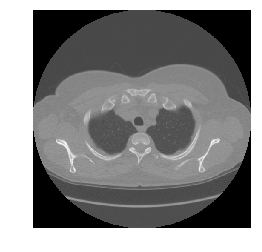

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(im, cmap='gray')
plt.axis('off')


## Exercise

### Load images

In this chapter, we'll work with sections of a [computed tomography](https://en.wikipedia.org/wiki/CT_scan) [(CT)](https://en.wikipedia.org/wiki/CT_scan) scan from [The Cancer Imaging Archive](http://www.cancerimagingarchive.net/about-the-cancer-imaging-archive-tcia/). CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the imageio package to load a single DICOM image from the scan volume and check out a few of its attributes.

### Metadata

ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

* ***Patient demographics:*** name, age, sex, clinical information
* ***Acquisition information:*** image shape, sampling rates, data type, [modality](https://en.wikipedia.org/wiki/Medical_imaging#Imaging_modalities) (such as X-Ray, CT or MRI)

Start this exercise by reading in the chest image and listing the available fields in the meta dictionary. 

### Plot images

Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's imshow() function gives you a simple way to do this. Knowing a few simple arguments will help:

* _cmap_ controls the color mappings for each value. The "gray" colormap is common, but many others are available.
* *vmin* and *vmax* control the color contrast between values. Changing these can reduce the influence of extreme values.
* *plt.axis('off')* removes axis and tick labels from the image.

For this exercise, plot the CT scan and investigate the effect of a few different parameters.

In [12]:
# import ImageIO
import imageio

# load dicom image
image = imageio.imread('images/head_3.dcm')

# print image attributes
print('Image type:', type(image))
print('Shape of image array:', image.shape)
print((image.meta).keys())


Image type: <class 'imageio.core.util.Image'>
Shape of image array: (512, 512)


# N-dimensional images

In [14]:
import numpy as np
im1 = imageio.imread('images/head_1.dcm')
im2 = imageio.imread('images/head_2.dcm')
im3 = imageio.imread('images/head_3.dcm')
im4 = imageio.imread('images/head_4.dcm')
im5 = imageio.imread('images/head_5.dcm')


In [15]:
im1.shape

(512, 512)

In [16]:
vol = np.stack([im1, im2, im3, im4, im5])

In [17]:
vol.shape

(5, 512, 512)

### Loading volumes directly

imageio.volread():
* read multi-dimensional data directly
* assemble a volume from multiple images

In [ ]:
import os